278470.KS Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 5ÎÖÑ):
 Price          Close      High       Low      Open    Volume
Ticker     278470.KS 278470.KS 278470.KS 278470.KS 278470.KS
Date                                                        
2025-07-31  183700.0  188500.0  175900.0  176000.0    630657
2025-08-01  172000.0  180400.0  167800.0  179800.0    612884
2025-08-04  178600.0  179500.0  173100.0  173500.0    334690
2025-08-05  187300.0  189700.0  181400.0  184500.0    595552
2025-08-06  208500.0  224000.0  185200.0  194700.0   2829191

Ïù¥ÎèôÌèâÍ∑† Î∞è Í±∞Îûò Ïã†Ìò∏ Îç∞Ïù¥ÌÑ∞:
 Price          Close           5_MA          20_MA          50_MA  \
Ticker     278470.KS                                                
Date                                                                
2025-07-24  170310.0  171015.134375  159767.231250  137513.325625   
2025-07-25  171700.0  172057.031250  161070.719531  138804.494844   
2025-07-28  167500.0  171847.600000  161894.885156  139990.118281   
2025-07-29  181300

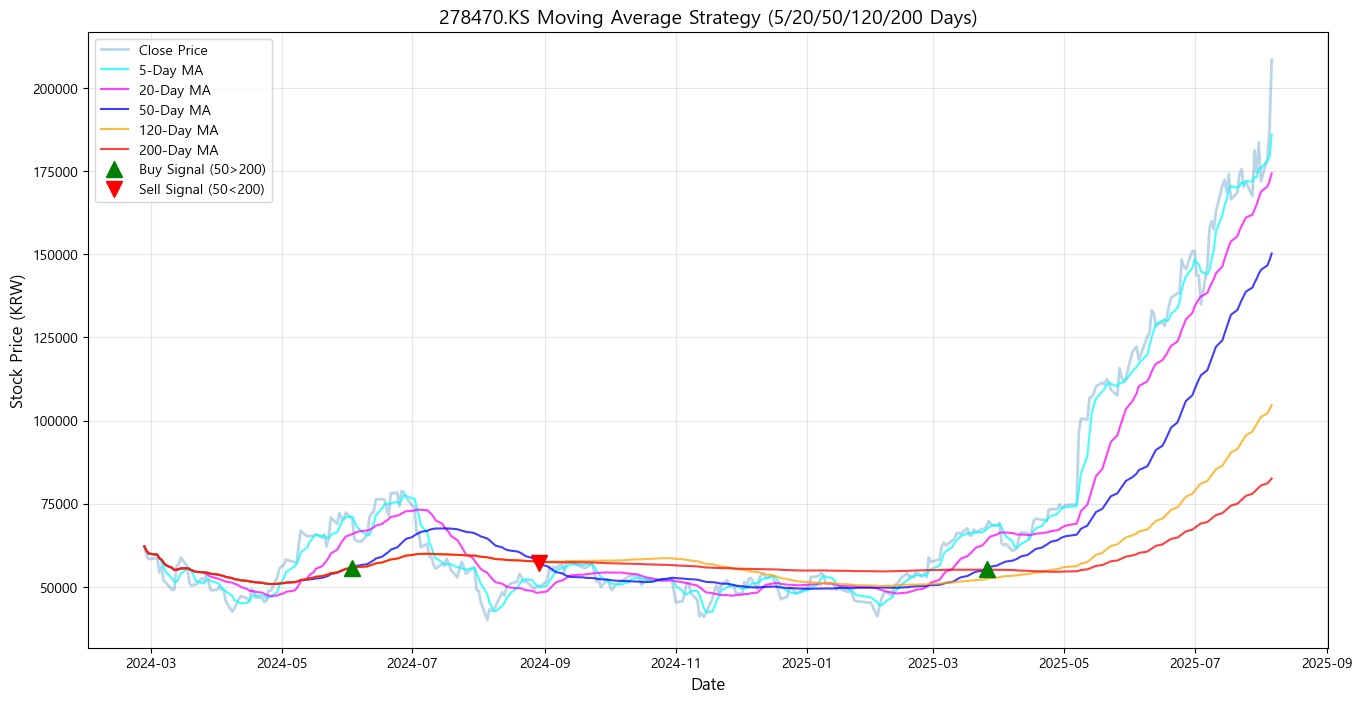

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
ticker = '278470.KS'  # ÌïúÍµ≠Ï£ºÏãù Ìã∞Ïª§ (KS: ÏΩîÏä§Ìîº, KQ: ÏΩîÏä§Îã•)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"{ticker}Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò§Îäî Îç∞ Ïã§Ìå®ÌñàÏäµÎãàÎã§. Ìã∞Ïª§Î•º ÌôïÏù∏ÌïòÍ±∞ÎÇò ÎÇ†Ïßú Î≤îÏúÑÎ•º Ï°∞Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.")
else:
    print(f"{ticker} Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 5ÎÖÑ):\n", data.tail())

    # 2. Ïù¥ÎèôÌèâÍ∑† Í≥ÑÏÇ∞ (Í∏∞Ï°¥ 50Ïùº, 200Ïùº + ÏÉàÎ°ú Ï∂îÍ∞Ä)
    windows = [5, 20, 50, 120, 200]  # 5Ïùº, 20Ïùº, 50Ïùº, 120Ïùº, 200Ïùº
    ma_labels = ['5-Day', '20-Day', '50-Day', '120-Day', '200-Day']
    colors = ['cyan', 'magenta', 'blue', 'orange', 'red']  # Í∞Å Ïù¥ÌèâÏÑ† ÏÉâÏÉÅ
    
    for window, label in zip(windows, ma_labels):
        data[f'{window}_MA'] = data['Close'].rolling(window=window, min_periods=1).mean()

    # 3. Í±∞Îûò Ïã†Ìò∏ ÏÉùÏÑ± (Í∏∞Ï°¥ Ï†ÑÎûµ Ïú†ÏßÄ - 50Ïùº vs 200Ïùº Í∏∞Ï§Ä)
    data['Signal'] = 0
    data.loc[data.index[50:], 'Signal'] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1, 0)
    data['Position'] = data['Signal'].diff()

    print("\nÏù¥ÎèôÌèâÍ∑† Î∞è Í±∞Îûò Ïã†Ìò∏ Îç∞Ïù¥ÌÑ∞:\n", data[['Close', '5_MA', '20_MA', '50_MA', '120_MA', '200_MA', 'Signal', 'Position']].tail(10))

    # 4. ÏãúÍ∞ÅÌôî (Ï∂îÍ∞ÄÎêú Ïù¥ÌèâÏÑ† Î∞òÏòÅ)
    plt.figure(figsize=(16, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.3, linewidth=2)

    # Î™®Îì† Ïù¥ÎèôÌèâÍ∑†ÏÑ† ÌîåÎ°Ø
    for window, color, label in zip(windows, colors, ma_labels):
        plt.plot(data[f'{window}_MA'], label=f'{label} MA', color=color, alpha=0.75)

    # Îß§Ïàò/Îß§ÎèÑ Ïã†Ìò∏ ÌëúÏãú (Í∏∞Ï°¥ Ï†ÑÎûµ Í∏∞Ï§Ä)
    plt.plot(data[data['Position'] == 1].index,
             data['50_MA'][data['Position'] == 1],
             '^', markersize=12, color='g', lw=0, label='Buy Signal (50>200)')
    plt.plot(data[data['Position'] == -1].index,
             data['50_MA'][data['Position'] == -1],
             'v', markersize=12, color='r', lw=0, label='Sell Signal (50<200)')

    plt.title(f'{ticker} Moving Average Strategy (5/20/50/120/200 Days)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (KRW)', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()


278470.KS Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 5ÎÖÑ):
 Price          Close      High       Low      Open    Volume
Ticker     278470.KS 278470.KS 278470.KS 278470.KS 278470.KS
Date                                                        
2025-07-31  183700.0  188500.0  175900.0  176000.0    630657
2025-08-01  172000.0  180400.0  167800.0  179800.0    612884
2025-08-04  178600.0  179500.0  173100.0  173500.0    334690
2025-08-05  187300.0  189700.0  181400.0  184500.0    595552
2025-08-06  208500.0  224000.0  185200.0  194700.0   2829191

Ïù¥ÎèôÌèâÍ∑† Î∞è Í±∞Îûò Ïã†Ìò∏ Îç∞Ïù¥ÌÑ∞:
 Price          Close           5_MA          20_MA          50_MA  \
Ticker     278470.KS                                                
Date                                                                
2025-07-24  170310.0  171015.134375  159767.231250  137513.325625   
2025-07-25  171700.0  172057.031250  161070.719531  138804.494844   
2025-07-28  167500.0  171847.600000  161894.885156  139990.118281   
2025-07-29  181300

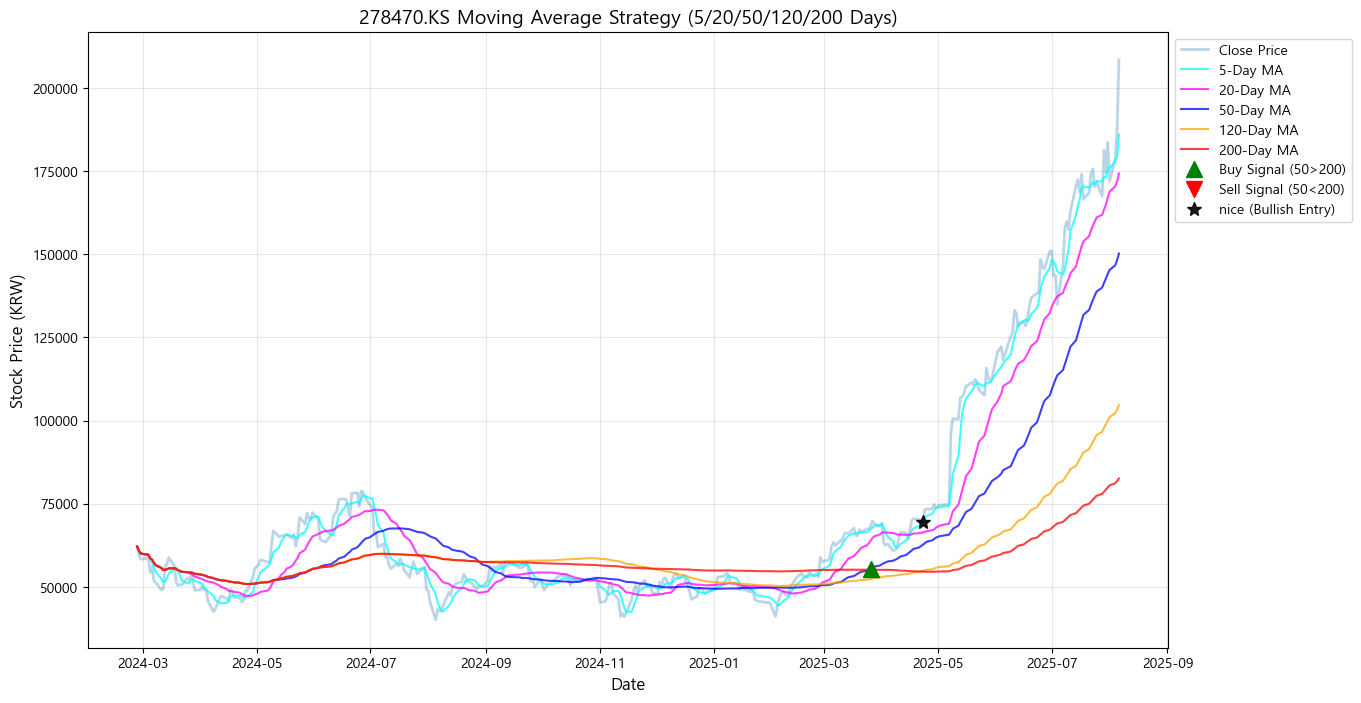

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
ticker = '278470.KS'  # ÌïúÍµ≠Ï£ºÏãù Ìã∞Ïª§ (KS: ÏΩîÏä§Ìîº, KQ: ÏΩîÏä§Îã•)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"{ticker}Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò§Îäî Îç∞ Ïã§Ìå®ÌñàÏäµÎãàÎã§. Ìã∞Ïª§Î•º ÌôïÏù∏ÌïòÍ±∞ÎÇò ÎÇ†Ïßú Î≤îÏúÑÎ•º Ï°∞Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.")
else:
    print(f"{ticker} Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 5ÎÖÑ):\n", data.tail())

    # 2. Ïù¥ÎèôÌèâÍ∑† Í≥ÑÏÇ∞ (Í∏∞Ï°¥ 50Ïùº, 200Ïùº + ÏÉàÎ°ú Ï∂îÍ∞Ä)
    windows = [5, 20, 50, 120, 200]  # 5Ïùº, 20Ïùº, 50Ïùº, 120Ïùº, 200Ïùº
    ma_labels = ['5-Day', '20-Day', '50-Day', '120-Day', '200-Day']
    colors = ['cyan', 'magenta', 'blue', 'orange', 'red']  # Í∞Å Ïù¥ÌèâÏÑ† ÏÉâÏÉÅ
    
    for window, label in zip(windows, ma_labels):
        data[f'{window}_MA'] = data['Close'].rolling(window=window, min_periods=1).mean()

    # 3. Í±∞Îûò Ïã†Ìò∏ ÏÉùÏÑ± (Í∏∞Ï°¥ Ï†ÑÎûµ Ïú†ÏßÄ - 50Ïùº vs 200Ïùº Í∏∞Ï§Ä)
    data['Signal'] = 0
    # 200Ïùº MAÎ•º ÏÇ¨Ïö©ÌïòÎØÄÎ°ú ÏµúÏÜå 200Ïùº Îç∞Ïù¥ÌÑ∞ ÌïÑÏöî
    min_signal_idx = max(50, 200) 
    if len(data) > min_signal_idx:
        data.loc[data.index[min_signal_idx:], 'Signal'] = np.where(data['50_MA'][min_signal_idx:] > data['200_MA'][min_signal_idx:], 1, 0)
    else:
        print("Warning: Not enough data points to generate full 50-day and 200-day MA signals.")
        data['Signal'] = 0 
        
    data['Position'] = data['Signal'].diff()

    # 4. Ï†ïÎ∞∞Ïó¥ 'nice' Ïã†Ìò∏ ÏÉùÏÑ± Î∞è ÏßÑÏûÖ Ïã†Ìò∏ (Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ)
    min_bullish_idx = max(windows) # Î™®Îì† MAÍ∞Ä Í≥ÑÏÇ∞Îê† Ïàò ÏûàÎäî Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.
    
    if len(data) > min_bullish_idx:
        # 4-1. Î™®Îì† MAÍ∞Ä Ï†ïÎ∞∞Ïó¥Ïù∏ ÏÉÅÌÉúÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏûÑÏãú Ïª¨Îüº ÏÉùÏÑ± (5 > 20 > 50 > 120 > 200)
        data['Is_Bullish_Aligned'] = np.where(
            (data['5_MA'] > data['20_MA']) &
            (data['20_MA'] > data['50_MA']) &
            (data['50_MA'] > data['120_MA']) &
            (data['120_MA'] > data['200_MA']),
            1, 0
        )
        
        # 4-2. Ïó≠Ï†ïÎ∞∞Ïó¥ÏóêÏÑú Ï†ïÎ∞∞Ïó¥Î°ú 'Ï†ÑÌôò'ÎêòÎäî ÏãúÏ†êÎßå Ìè¨Ï∞©ÌïòÏó¨ 'Nice_Entry_Signal' ÏÉùÏÑ±
        data['Nice_Entry_Signal'] = np.where(
            (data['Is_Bullish_Aligned'].shift(1) == 0) & (data['Is_Bullish_Aligned'] == 1),
            1, 0
        )
        # NaN Í∞í(Ï¥àÍ∏∞ Î∂ÄÎ∂Ñ)ÏùÄ 0ÏúºÎ°ú Ï±ÑÏõÄ
        data['Nice_Entry_Signal'] = data['Nice_Entry_Signal'].fillna(0)
    else:
        data['Is_Bullish_Aligned'] = 0
        data['Nice_Entry_Signal'] = 0 # Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÎ©¥ Ïã†Ìò∏ ÏóÜÏùå


    print("\nÏù¥ÎèôÌèâÍ∑† Î∞è Í±∞Îûò Ïã†Ìò∏ Îç∞Ïù¥ÌÑ∞:\n", data[['Close', '5_MA', '20_MA', '50_MA', '120_MA', '200_MA', 'Signal', 'Position', 'Is_Bullish_Aligned', 'Nice_Entry_Signal']].tail(10))

    # 5. ÏãúÍ∞ÅÌôî (Ï∂îÍ∞ÄÎêú Ïù¥ÌèâÏÑ† Î∞òÏòÅ)
    plt.figure(figsize=(16, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.3, linewidth=2)

    # Î™®Îì† Ïù¥ÎèôÌèâÍ∑†ÏÑ† ÌîåÎ°Ø
    for window, color, label in zip(windows, colors, ma_labels): # <-- Ïù¥ Î∂ÄÎ∂ÑÏóê 'colors' Ï∂îÍ∞Ä
        plt.plot(data[f'{window}_MA'], label=f'{label} MA', color=color, alpha=0.75)

    # Îß§Ïàò/Îß§ÎèÑ Ïã†Ìò∏ ÌëúÏãú (Í∏∞Ï°¥ Ï†ÑÎûµ Í∏∞Ï§Ä)
    plt.plot(data[data['Position'] == 1].index,
             data['50_MA'][data['Position'] == 1],
             '^', markersize=12, color='g', lw=0, label='Buy Signal (50>200)')
    plt.plot(data[data['Position'] == -1].index,
             data['50_MA'][data['Position'] == -1],
             'v', markersize=12, color='r', lw=0, label='Sell Signal (50<200)')

    # Ï†ïÎ∞∞Ïó¥ 'nice' ÏßÑÏûÖ Ïã†Ìò∏ ÌëúÏãú Ï∂îÍ∞Ä
    plt.plot(data[data['Nice_Entry_Signal'] == 1].index,
             data['Close'][data['Nice_Entry_Signal'] == 1], # Ï¢ÖÍ∞Ä ÏúÑÏπòÏóê ÎßàÏª§ ÌëúÏãú
             '*', markersize=10, color='black', alpha=0.9, lw=0, label='nice (Bullish Entry)')


    plt.title(f'{ticker} Moving Average Strategy (5/20/50/120/200 Days)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (KRW)', fontsize=12) # ÌïúÍµ≠ Ï£ºÏãù Í∏∞Ï§Ä ÌôîÌèê Îã®ÏúÑ
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) # Î≤îÎ°ÄÎ•º Í∑∏ÎûòÌîÑ Î∞ñÏóê Î∞∞Ïπò
    plt.subplots_adjust(right=0.8) # Í∑∏ÎûòÌîÑ Ïò§Î•∏Ï™Ω Ïó¨Î∞±ÏùÑ ÎäòÎ†§ Î≤îÎ°ÄÍ∞Ä Îì§Ïñ¥Í∞à Í≥µÍ∞Ñ ÌôïÎ≥¥
    plt.grid(True, alpha=0.3)
    plt.show()


‚úÖ 278470.KS ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ (Ï†ïÎ∞∞Ïó¥ Î∂ÑÏÑù)



C:\Users\glasr\AppData\Local\Temp\ipykernel_31072\3773390031.py:66: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
C:\Users\glasr\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


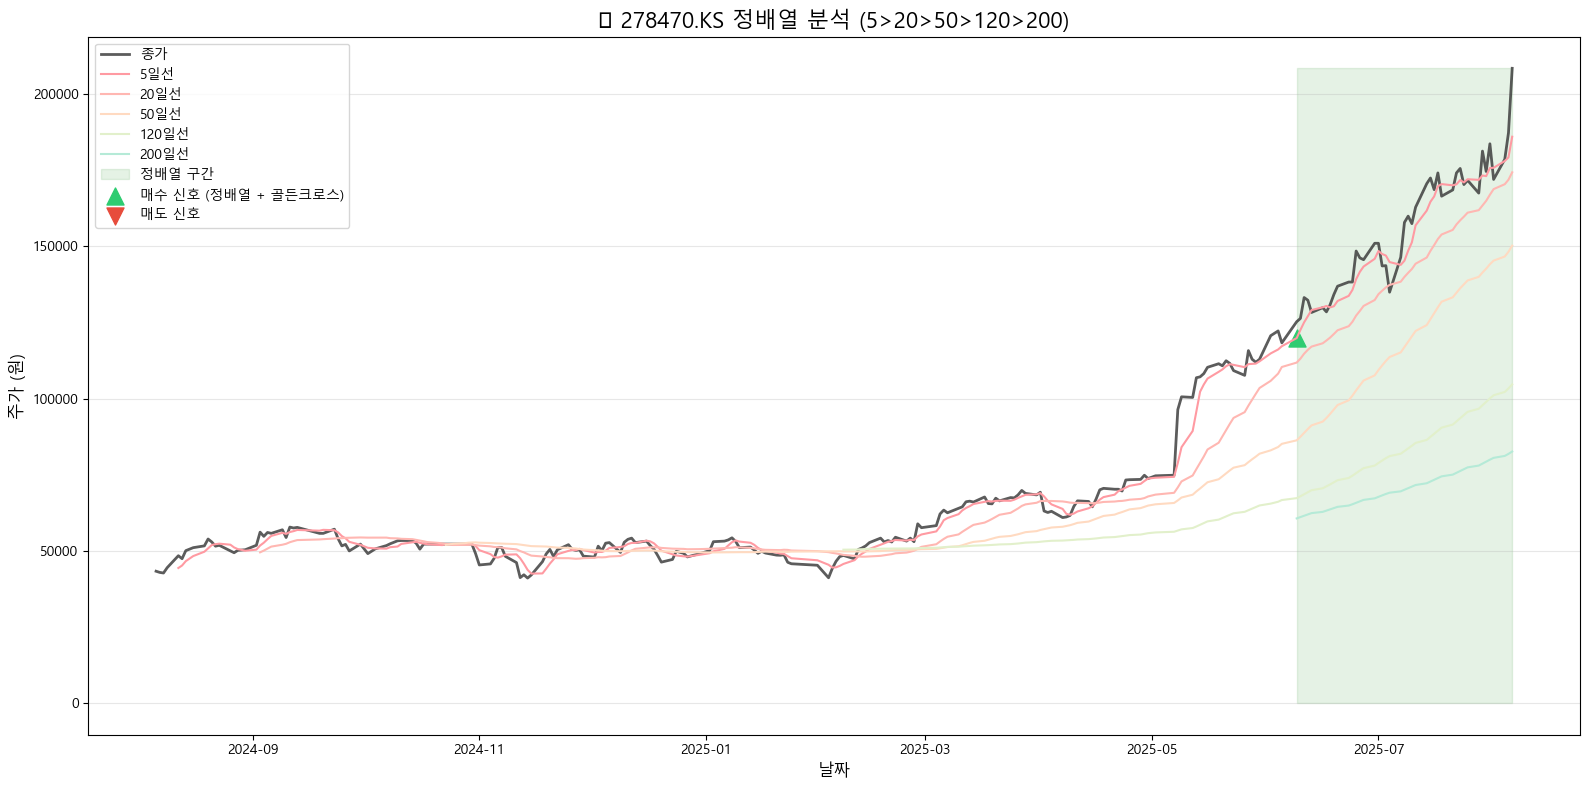

üìà ÏµúÍ∑º ÏÉÅÌÉú: Ï†ïÎ∞∞Ïó¥
üìä 5ÏùºÏÑ† ÏúÑÏπò: 186020Ïõê
üìâ 200ÏùºÏÑ† ÏúÑÏπò: 82607Ïõê



In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
ticker = '278470.KS'  # ÏóêÏä§Ïï§Îîî (ÏΩîÏä§Îã•)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÏÑù

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"‚ö†Ô∏è {ticker} Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Ïã§Ìå®!")
else:
    print(f"‚úÖ {ticker} ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ (Ï†ïÎ∞∞Ïó¥ Î∂ÑÏÑù)\n")

    # 2. Ïù¥ÎèôÌèâÍ∑† Í≥ÑÏÇ∞ (5ÏùºÏÑ† Ìè¨Ìï®)
    windows = [5, 20, 50, 120, 200]
    ma_labels = ['5Ïùº', '20Ïùº', '50Ïùº', '120Ïùº', '200Ïùº']
    
    for window in windows:
        data[f'MA_{window}'] = data['Close'].rolling(window=window).mean()

    # 3. Ï†ïÎ∞∞Ïó¥ Ïó¨Î∂Ä ÌåêÎã® (5>20>50>120>200)
    data['Ï†ïÎ∞∞Ïó¥'] = (
        (data['MA_5'] > data['MA_20']) & 
        (data['MA_20'] > data['MA_50']) & 
        (data['MA_50'] > data['MA_120']) & 
        (data['MA_120'] > data['MA_200'])
    )

    # 4. Í±∞Îûò Ïã†Ìò∏ (Ï†ïÎ∞∞Ïó¥ + 5ÏùºÏÑ† > 20ÏùºÏÑ† Í≥®Îì†ÌÅ¨Î°úÏä§ Ïãú Îß§Ïàò)
    data['Signal'] = 0
    data.loc[data['Ï†ïÎ∞∞Ïó¥'] & (data['MA_5'] > data['MA_20']), 'Signal'] = 1
    data['Position'] = data['Signal'].diff()

    # 5. ÏãúÍ∞ÅÌôî (Ï†ïÎ∞∞Ïó¥ Í∞ïÏ°∞)
    plt.figure(figsize=(16, 8))
    
    # Ï£ºÍ∞Ä Î∞è Ïù¥ÌèâÏÑ†
    plt.plot(data['Close'], label='Ï¢ÖÍ∞Ä', color='#333333', lw=2, alpha=0.8)
    colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7']
    for window, color in zip(windows, colors):
        plt.plot(data[f'MA_{window}'], label=f'{window}ÏùºÏÑ†', color=color, lw=1.5)

    # Ï†ïÎ∞∞Ïó¥ Íµ¨Í∞Ñ ÏÉâÏπ†
    plt.fill_between(data.index, 0, data['Close'].max(), 
                    where=data['Ï†ïÎ∞∞Ïó¥'], 
                    color='green', alpha=0.1, label='Ï†ïÎ∞∞Ïó¥ Íµ¨Í∞Ñ')

    # Îß§Ïàò/Îß§ÎèÑ Ïã†Ìò∏
    plt.scatter(data[data['Position'] == 1].index,
               data['MA_5'][data['Position'] == 1],
               marker='^', s=150, color='#2ECC71', label='Îß§Ïàò Ïã†Ìò∏ (Ï†ïÎ∞∞Ïó¥ + Í≥®Îì†ÌÅ¨Î°úÏä§)')
    plt.scatter(data[data['Position'] == -1].index,
               data['MA_5'][data['Position'] == -1],
               marker='v', s=150, color='#E74C3C', label='Îß§ÎèÑ Ïã†Ìò∏')

    plt.title(f'üöÄ {ticker} Ï†ïÎ∞∞Ïó¥ Î∂ÑÏÑù (5>20>50>120>200)', fontsize=16)
    plt.xlabel('ÎÇ†Ïßú', fontsize=12)
    plt.ylabel('Ï£ºÍ∞Ä (Ïõê)', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 6. ÏµúÍ∑º Ï†ïÎ∞∞Ïó¥ ÏÉÅÌÉú Ï∂úÎ†•
    recent_status = "Ï†ïÎ∞∞Ïó¥" if data['Ï†ïÎ∞∞Ïó¥'].iloc[-1] else "Ïó≠Î∞∞Ïó¥ ÎòêÎäî ÎπÑÏ†ïÎ∞∞Ïó¥"
    print(f"üìà ÏµúÍ∑º ÏÉÅÌÉú: {recent_status}")
    print(f"üìä 5ÏùºÏÑ† ÏúÑÏπò: {data['MA_5'].iloc[-1]:.0f}Ïõê")
    print(f"üìâ 200ÏùºÏÑ† ÏúÑÏπò: {data['MA_200'].iloc[-1]:.0f}Ïõê\n")

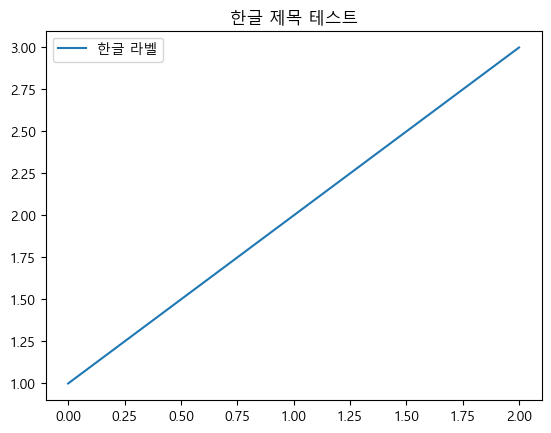

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. ÏãúÏä§ÌÖúÏóê ÏÑ§ÏπòÎêú ÌïúÍ∏Ä Ìè∞Ìä∏ Ï∞æÍ∏∞
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
kor_font = [f for f in font_path if 'malgun' in f.lower() or 'gothic' in f.lower()][0]  # ÎßëÏùÄ Í≥†Îîï ÎòêÎäî Íµ¥Î¶ºÏ≤¥ ÏÑ†ÌÉù

# 2. Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows Í∏∞Ï§Ä
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# 3. Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.title('ÌïúÍ∏Ä Ï†úÎ™© ÌÖåÏä§Ìä∏')
plt.plot([1, 2, 3], label='ÌïúÍ∏Ä ÎùºÎ≤®')
plt.legend()
plt.show()